# Ford GoBike
## by Vitalijus Kuica

## Preliminary Wrangling

> This datset focuses on bike sharing information across San Francisco. Dataset includes nearly 200k trips with duration of the trip, type of user, gender, location of start/end stations, station names and timestaps.

In [474]:
import pandas as pd 
import numpy as np 
from math import sin, cos, sqrt, radians
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [475]:
df_orig = pd.read_csv('201902-fordgobike-tripdata.csv')

#### Making a copy of dataset for analysis

In [476]:
df = df_orig.copy()

### Inspecting dataset

In [477]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [478]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Seems like start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender have some missing values.

In [480]:
df.start_time.duplicated().sum()

11

In [481]:
df.end_time.duplicated().sum()

15

For this analysis I would assume people finished and started trip at the same time. Dataset is huge and there is a chance of this because legit. However, in another analysis this could be a red flag for duplicate data entry

### What is the structure of your dataset?

> It contains ~180k datapoints for bike sharing services. Some data for start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender have some missing values. 
Not too many numerical values can be used as it provided.

### What is/are the main feature(s) of interest in your dataset?

> Mostly I am interest in when people use Ford GoBike. I want to understand who uses it, which days, which hours and where.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Many good data is given such as birth date, start and end of the trip, locations where bike was taken for the trip and where it was left. Also, duration of the trip with location coordinates of the station.

#### Feature engineering - Calculating age based on birth date (age is back in 2019 when data was collected)

In [482]:
df['age'] = 2019 - df['member_birth_year']

In [483]:
df['age'] = df['age'].replace(2019,0)

In [484]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


#### Identifying number of unique values. It helps to understand how many different sharings happened, number of locations and etc.

In [485]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
age                            75
dtype: int64

#### Feature engineering - getting hour of the day when bike sharing took place (if sharing happened 13.01 it will be shown as 13)

In [486]:
df['time_of_day'] = df['start_time'].str[10:13]

In [487]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,time_of_day
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,17
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,18


#### Feature engineering -  change duration to minutes from seconds

In [488]:
duration = ['duration_sec']
for x in duration:
    df[x] = df[x].apply(lambda x: x / 60)

#### Rename column to correctly reflect variable

In [489]:
df = df.rename(columns={'duration_sec':'duration_min'})

In [490]:
df.head(2)

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,time_of_day
0,869.750000,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,17
1,708.683333,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,18


#### Changing data types for start date and end date

In [491]:
df['start_time'] =  pd.to_datetime(df['start_time'], format='%Y%m%d %H:%M:%S')
df['end_time'] =  pd.to_datetime(df['end_time'], format='%Y%m%d %H:%M:%S')

#### Changing birthday year from integer to date

In [492]:
df['member_birth_year'] =  pd.to_datetime(df['member_birth_year'], format='%Y')

#### Feature engineering - extracting weekday from start time of the ride

In [493]:
df['weekday_start_trip'] = df['start_time'].dt.dayofweek

In [494]:
week_day = ['weekday_start_trip']
weekday_number = [0,1,2,3,4,5,6]
weekday_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for x in week_day:
    df[x] = df[x].replace(weekday_number,weekday_name)

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             183412 non-null  float64       
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

#### Changing user type, gender, and weekday name to cattegorical variable

In [496]:
for col in ['user_type', 'member_gender','weekday_start_trip']:
    df[col] = df[col].astype('category')

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             183412 non-null  float64       
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

## Univariate Exploration

In [498]:
#Function for all histograms in analysis
def histogram(size_x,size_y,data,axis,bins,x_label,y_label,title):
    plt.figure(figsize=(size_x,size_y))
    plt.hist(data=data,x=axis,bins=bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

#### Birth year histogram

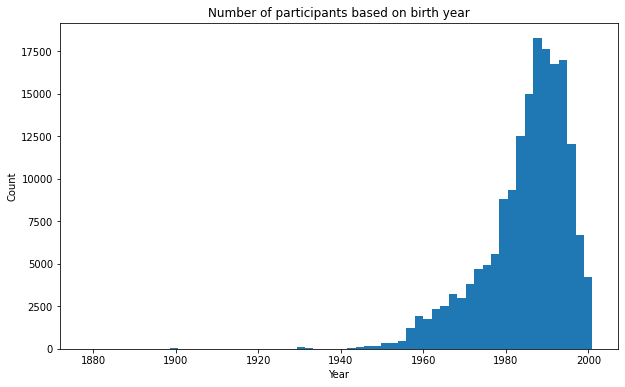

In [499]:
histogram(10,6,df,'member_birth_year',60,'Year','Count',
          'Number of participants based on birth year')

Histogram shows interesting fact that soje paticipants are born in 19th century. This seems as an error because even if people are still alive they won't be able to participate in race at about 120 years of age. Same applies to people born in around 1930. As expected this histogram is left skewed but that makes perfect sense.

#### Cycling distance histogram 

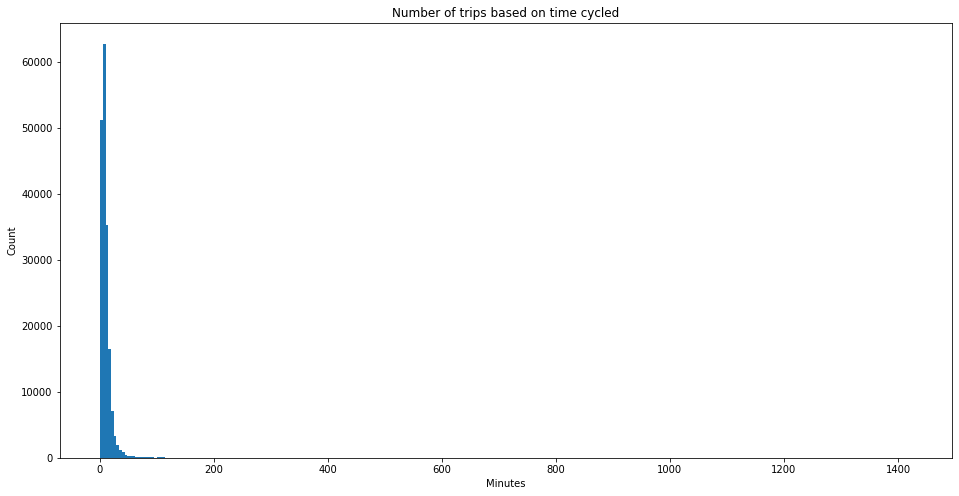

In [500]:
histogram(16,8,df,'duration_min',300,'Minutes','Count',
          'Number of trips based on time cycled')

Very right skewed due to some big outlier points of usually long trips 

#### Info function showed gender to be 3 options. Plotting bar charts to see distrubution between these options

In [501]:
#Same color pallet for all analysis
color = sns.color_palette()[0]

#Function for all countbars
def countbar(data,axis,x_label,title):

    freq = data[axis].value_counts()
    gen_order = freq.index

    sns.countplot(data=data,x=axis,color=color,order=gen_order)

    plt.title(title)
    plt.xlabel(x_label);

#### Number of users based on gender

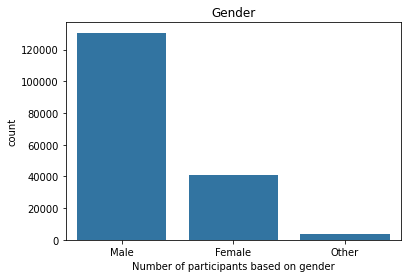

In [502]:
countbar(df,'member_gender','Number of participants based on gender','Gender')

Vast majority of participants are male which is over 120k. There area about 3 times fewer female participants. Where unidentified accounts for just a very small faction.

#### Checking for distrubution between customers and subscribers

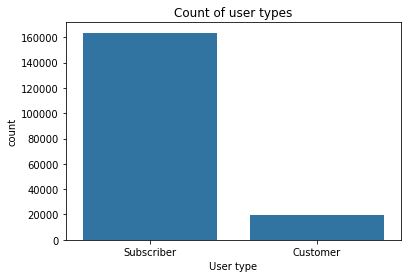

In [503]:
countbar(df,'user_type','User type','Count of user types')

Clearly most of bike sharing users are subcription based clients

#### Plotting number of rides based on weekday

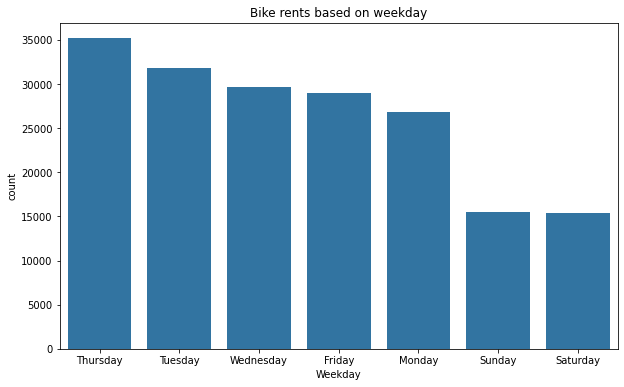

In [504]:
plt.figure(figsize=(10,6))
countbar(df,'weekday_start_trip','Weekday','Bike rents based on weekday')

Seems like most bike rents happen on Thursdays followed by Tuesday. Weekends are least popular among bike sharers.

#### Plotting bike sharing during the day based on hour

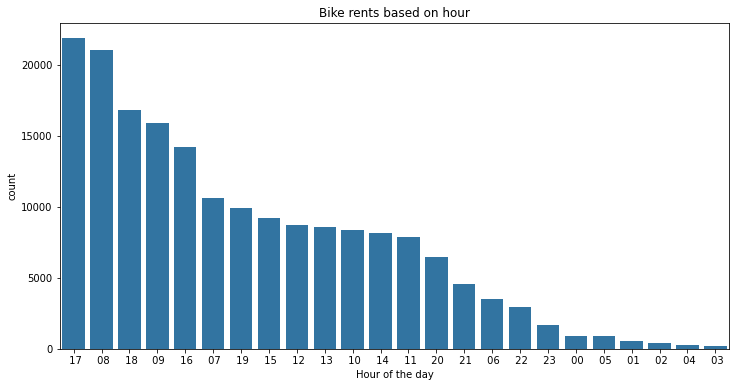

In [505]:
plt.figure(figsize=(12,6))
countbar(df,'time_of_day','Hour of the day','Bike rents based on hour')

Rush hours are busiest. It could mean that people use bikes to cycle to and from work. Clearly night rides are not common as it could be expected.

#### Using given latitude and longitude calculating distance between renting points. It very important to keep in mind that this distane is not based on cycling route but it is distance on map regardless of route needed to reach end point.

In [506]:
# earth radius in m
R = 6371000

#convert latitude and longitude degrees into radians
df['lat1'] = np.radians(df['start_station_latitude'])
df['lon1'] = np.radians(df['start_station_longitude'])
df['lat2'] = np.radians(df['end_station_latitude'])
df['lon2'] = np.radians(df['end_station_longitude'])

#getting difference between start and end point
df['dlat'] = df['lat2'] - df['lat1']
df['dlon'] = df['lon2'] - df['lon1']

df['a'] = np.sin(df['dlat'] / 2)**2 + np.cos(df['lat1']) * np.cos(df['lat2']) * np.sin(df['dlon'] / 2)**2

df['c'] = 2 * np.arctan2(np.sqrt(df['a']), np.sqrt(1 - df['a']))

#calculating distance for each rent
df['distance_start_end'] = R * df['c'] 

I validate data points on Google maps to make sure I calculated distance correctly

#### Dropping data I don't need anymore

In [507]:
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude',
        'lat1','lon1','lat2','lon2','dlat','dlon','a','c'], axis=1 , inplace=True)

In [508]:
df.head(2)

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,time_of_day,weekday_start_trip,distance_start_end
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984-01-01,Male,No,35.0,17,Thursday,544.708503
1,708.683333,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaT,NaN,No,NaN,18,Thursday,1742.999137


#### Using histogram to plot distance cycled

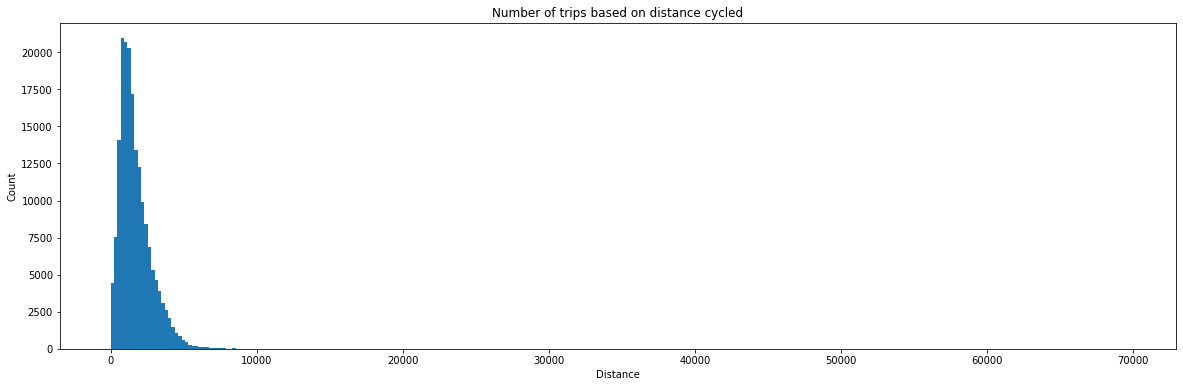

In [509]:
histogram(20,6,df,'distance_start_end',300,'Distance','Count',
          'Number of trips based on distance cycled')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> During analysis I found out that there are outliers in the dataset. For example birth year had people born in 19th century which is clearly data error. Also, quiet few other outliers indicating age of over 100 years. I then had perform transformation of data. I extracted hour of the day when people rent bikes to better understand demand throughout the day. As well, I added new cattegorical variable for day of the week to better understand which day people rent bikes the most. In addition, I got age based on birth date as it makes more sense in the analysis and is more readable/comparalbe. Finally, I got distance between start and end station based on latitute and longitudea and dropped no longer needed columns. On top of all this I changed weekday, gender, user type to be category instead of object. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As mentioned above I found some irregularities in the dataset but as this project is not centered about cleaning data I decided to keep original information there. Also, I didn't have anything to substitute error points and only option would be to drop that data. 

## Bivariate Exploration

#### Using violinplot to review trip duration during weekdays

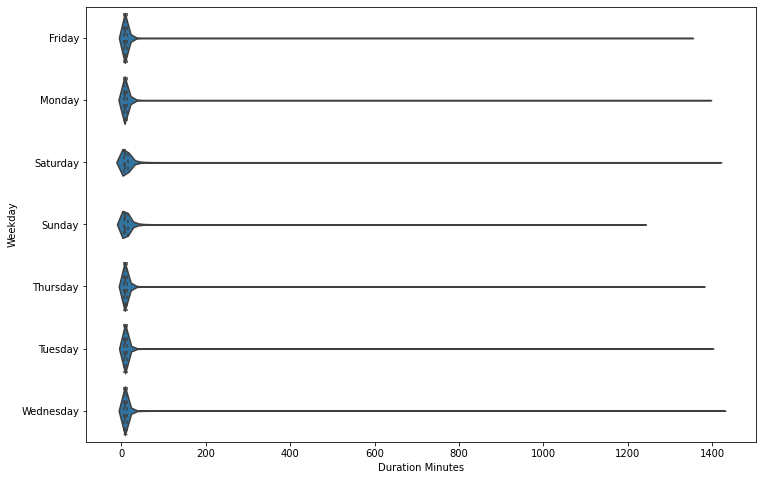

In [510]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df,y='weekday_start_trip',x='duration_min',color=color,inner = 'quartile')
plt.xlabel('Duration Minutes')
plt.ylabel('Weekday');

Full of outliers vilion chart. Clearly most are short trips but plenty of long trip outliers exist. Poor graph to read.

#### Plotting number of trips during during weekdays based on gender

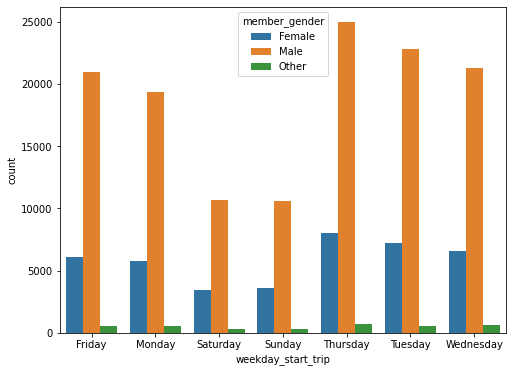

In [511]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'weekday_start_trip', hue = 'member_gender');

#### Using heatmap to plot trips during during weekdays based on user type.

In [512]:
cat_counts = df.groupby(['weekday_start_trip', 'user_type']).size()
cat_counts = cat_counts.reset_index(name='count')

In [513]:
cat_counts = cat_counts.pivot(index='weekday_start_trip',
                              columns = 'user_type',values='count')

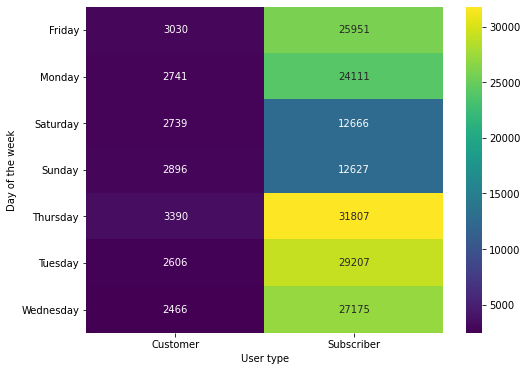

In [514]:
plt.figure(figsize=(8,6))
sns.heatmap(cat_counts,annot=True,fmt='d',cmap='viridis')
plt.xlabel('User type')
plt.ylabel('Day of the week')
plt.yticks(rotation=0);

Seems like most bike sharing users are subscribers which mostly cycle on Thursday and Tuesday and least on weekend. Non subscribers also mostly cycle on Thursdays and least on Wednesdays and Tuedays.

#### Plotting trip length based on the age.

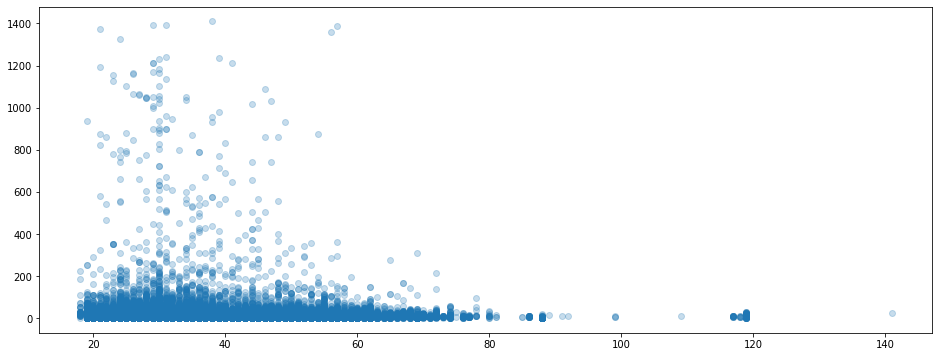

In [515]:
plt.figure(figsize=(16,6))
plt.scatter(data=df,x='age',y='duration_min',alpha=1/4);

Seems like outliers exist in both age and trip length. Trip length outliers can be justified. However, age outliers seems like data errors.

Righ skewed due to outliers

#### Checking high, low and std to better understand distance

In [516]:
df.describe()

,duration_min,start_station_id,end_station_id,bike_id,age,distance_start_end
count,183412.000000,183215.000000,183215.000000,183412.000000,175147.000000,183412.000000
mean,12.101307,138.590427,136.249123,4472.906375,34.193563,1690.659008
std,29.906496,111.778864,111.515131,1664.383394,10.116689,1097.588997
min,1.016667,3.000000,3.000000,11.000000,18.000000,0.000000
25%,5.416667,47.000000,44.000000,3777.000000,27.000000,910.955336
50%,8.566667,104.000000,100.000000,4958.000000,32.000000,1430.737708
75%,13.266667,239.000000,235.000000,5502.000000,39.000000,2225.686841
max,1424.066667,398.000000,398.000000,6645.000000,141.000000,69469.240682


#### Using log to plot correlation between distance cycled and trip duration

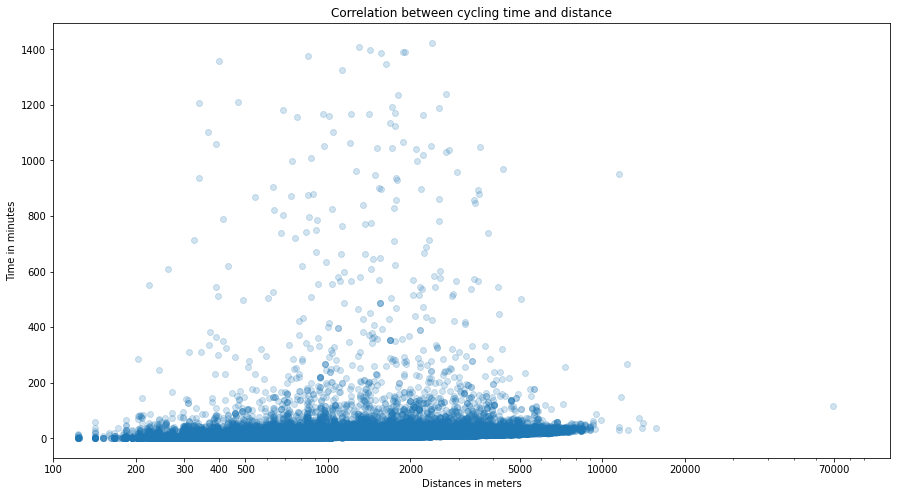

In [517]:
plt.figure(figsize=(15,8))

plt.xscale('log')
ticks = [100,200,300,400,500,1000,2000,5000,10000,20000,70000]
labels = ['{}'.format(x) for x in ticks]

plt.scatter(data=df,y='duration_min',x='distance_start_end',alpha=1/5)

plt.xlabel('Distances in meters')
plt.ylabel('Time in minutes')
plt.title('Correlation between cycling time and distance')

plt.xticks(ticks,labels);

Had to use alpha of 1/5 due to overplotting. Strangely it doesn't seem like there is strong correlation between trip length and distance. It could be do fact that we only measure distance on the map and don't track trip.

#### Using data sample of 1000 datapoints to avoid overplotting for distance vs time

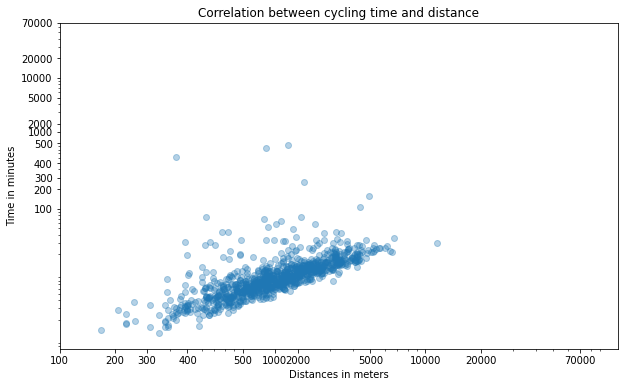

In [518]:
plt.figure(figsize=(10,6))

plt.xscale('log')
plt.yscale('log')


x_ticks = [100,200,300,500,1000,1500,2000,5000,10000,20000,70000]
x_labels = ['{}'.format(x) for x in ticks]

y_ticks = [100,200,300,500,1000,1500,2000,5000,10000,20000,70000]
y_labels = ['{}'.format(x) for x in ticks]

plt.scatter(data=df.sample(1000),y='duration_min',x='distance_start_end',alpha=1/3)

plt.xlabel('Distances in meters')
plt.ylabel('Time in minutes')
plt.title('Correlation between cycling time and distance')

plt.xticks(x_ticks,x_labels)
plt.yticks(y_ticks,y_labels);

When taking sample we can see that there is positive correlation between distance and trip time.

#### Grouping data based on weekday for further analysis

In [519]:
weekday = df.groupby('weekday_start_trip').mean()

In [520]:
#creating function for all bar charts in case studyn - mean calculation
def bar_chart(var,color,title,x_label,y_label,rotation,size_x,size_y):
    var
    plt.subplots(figsize=(size_x, size_y))
    plt.bar(var.index,var,color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation)
    plt.grid(axis='y',color='grey',linestyle = ':',alpha=0.7);

#### Plotting average trip duration based on weekdays

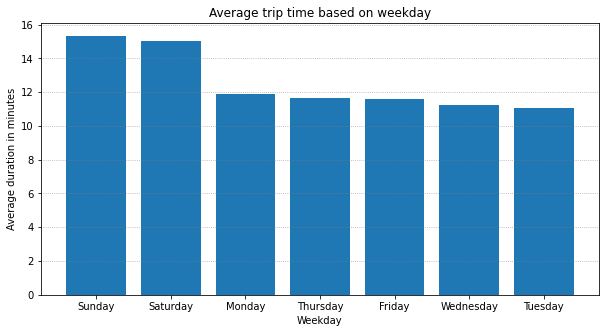

In [521]:
bar_chart(weekday['duration_min'].sort_values(ascending=False),color,
          'Average trip time based on weekday',
         'Weekday','Average duration in minutes',0,10,5)

It clearly looks like people are taking short trips in general. Longest average trips are during the weekend with just about 15min long. During business days are between ~11 to 12min on average.

#### Plotting trip length based on weekdays

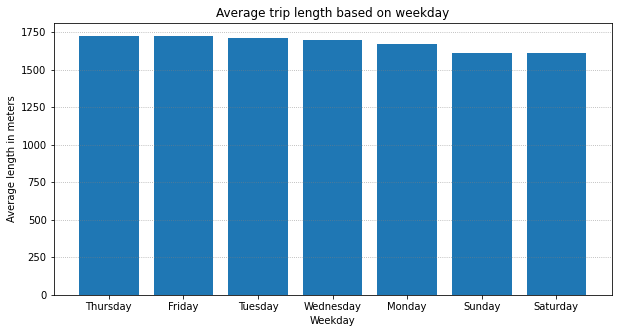

In [522]:
bar_chart(weekday['distance_start_end'].sort_values(ascending=False),color,
          'Average trip length based on weekday',
         'Weekday','Average length in meters',0,10,5)

Even though longest in terms of time trips are during the weekend days it looks like distance wise these trips are shortest. Thursday and Friday have on average longest distance cycled.

#### Grouping by age for further analysis

In [523]:
age = df.groupby('age').mean()

#### Plotting average trip length based on the age

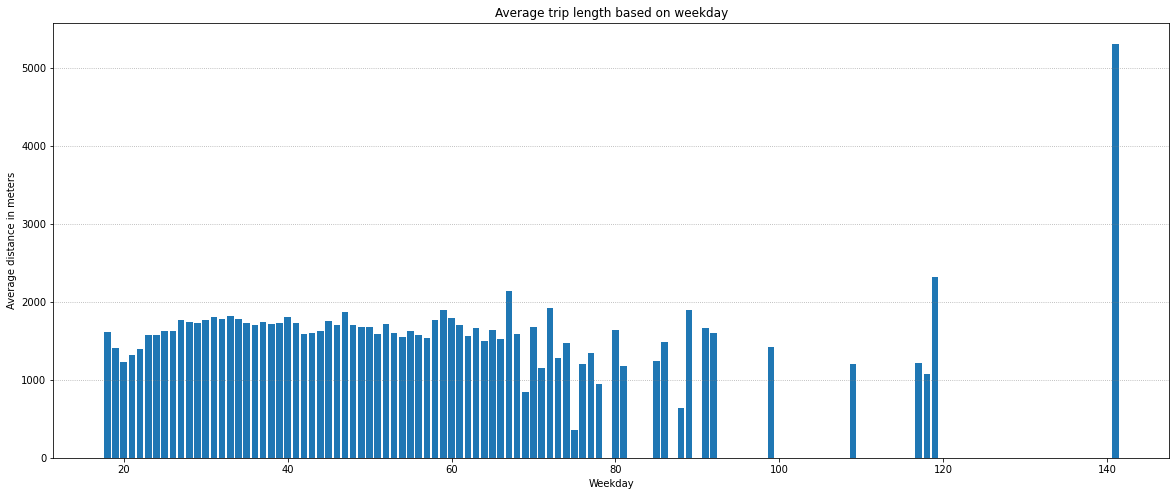

In [524]:
bar_chart(age['distance_start_end'],color,
          'Average trip length based on weekday',
         'Weekday','Average distance in meters',0,20,8)

First thing that comes to my eyes is spike at age group of over 140y old. Clearly these from 100 to 140 are data errors and shouldn't be included in clean data analysis. On the left it seems to be all good because we don't people under 18 renting bikes.

#### Plotting trip duration based in age

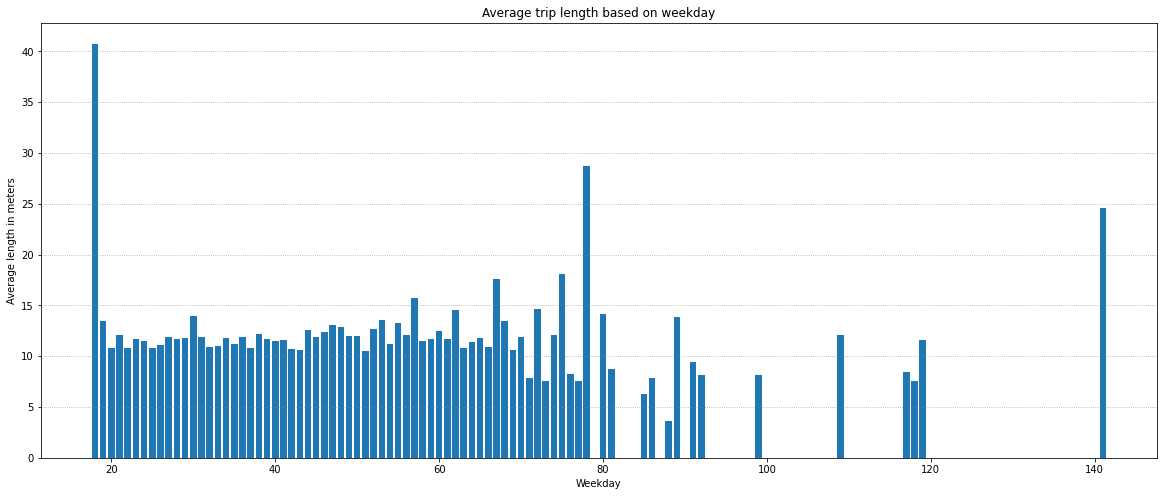

In [525]:
bar_chart(age['duration_min'],color,
          'Average trip length based on weekday',
         'Weekday','Average length in meters',0,20,8)

As before those over 100 shouldn't be in the data set. Intresting enough we have spike over 18y group. Potentially could be wrong data entry because this one age group is unlikely to cycle 3 times more than the rest.

#### Grouping by location for further analysis

In [526]:
location = df.groupby('start_station_name').mean()

#### Since there are over 300 location I will plot only top 15% to understand where people take bikes for longest trips

In [527]:
drop_location_low = location[location.duration_min > location.duration_min.quantile(.85)]

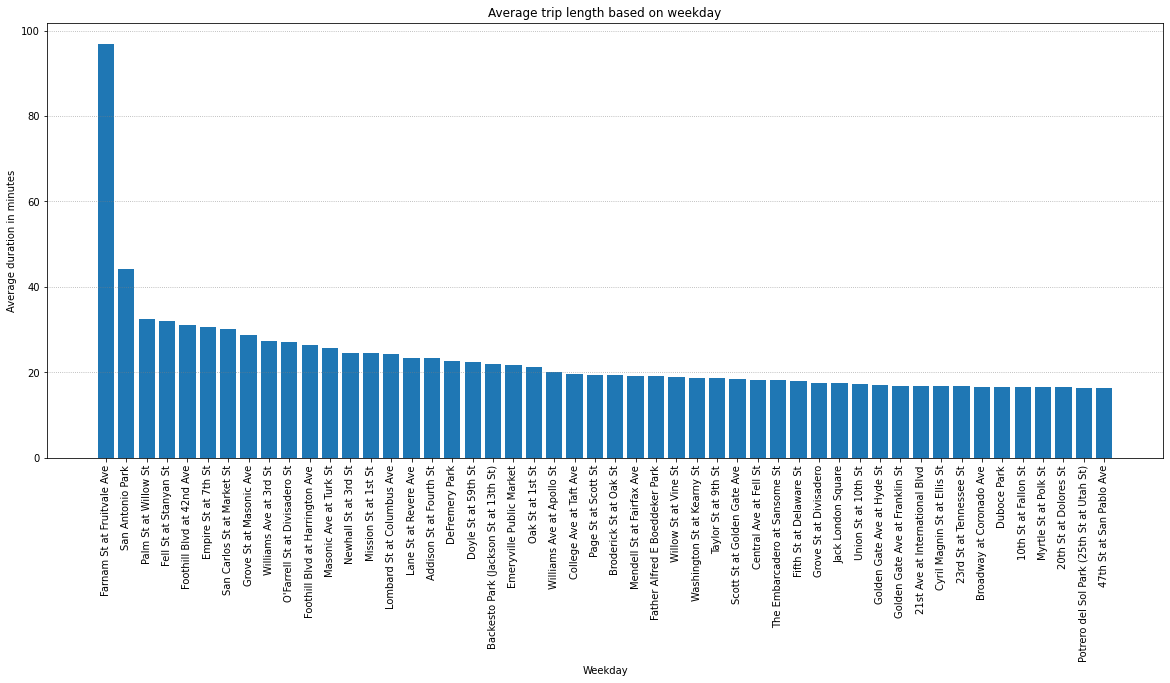

In [528]:
bar_chart(drop_location_low['duration_min'].sort_values(ascending=False),color,
          'Average trip length based on weekday',
         'Weekday','Average duration in minutes',90,20,8)

Longest trips are taking from Farman st. These trips are around 3 times longer than from other points. It could again be an outlier in the data but if not this is could be most distance point which leads to longer trips.

#### Plotting same top 15% of longest trips by distance based on the starting station

In [529]:
drop_location_low_dis= location[location.distance_start_end > location.distance_start_end.quantile(.85)]

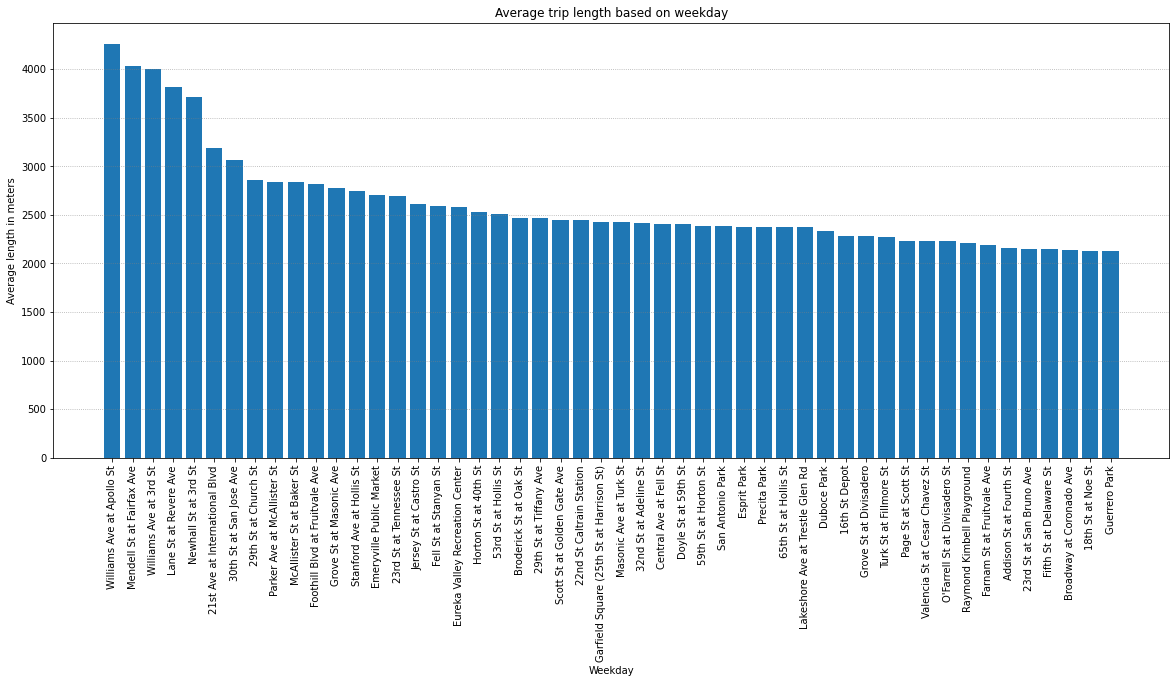

In [530]:
bar_chart(drop_location_low_dis['distance_start_end'].sort_values(ascending=False),color,
          'Average trip length based on weekday',
         'Weekday','Average length in meters',90,20,8)

Farman st. station is among top 15% but not at the top of the list. Longest trips are from William ave. followed by Mendell st. and another station and Willian av. 

#### Getting lowest 15% tips in terms of trip length

In [531]:
drop_location_high_dis = location[location.distance_start_end < location.distance_start_end.quantile(.15)]

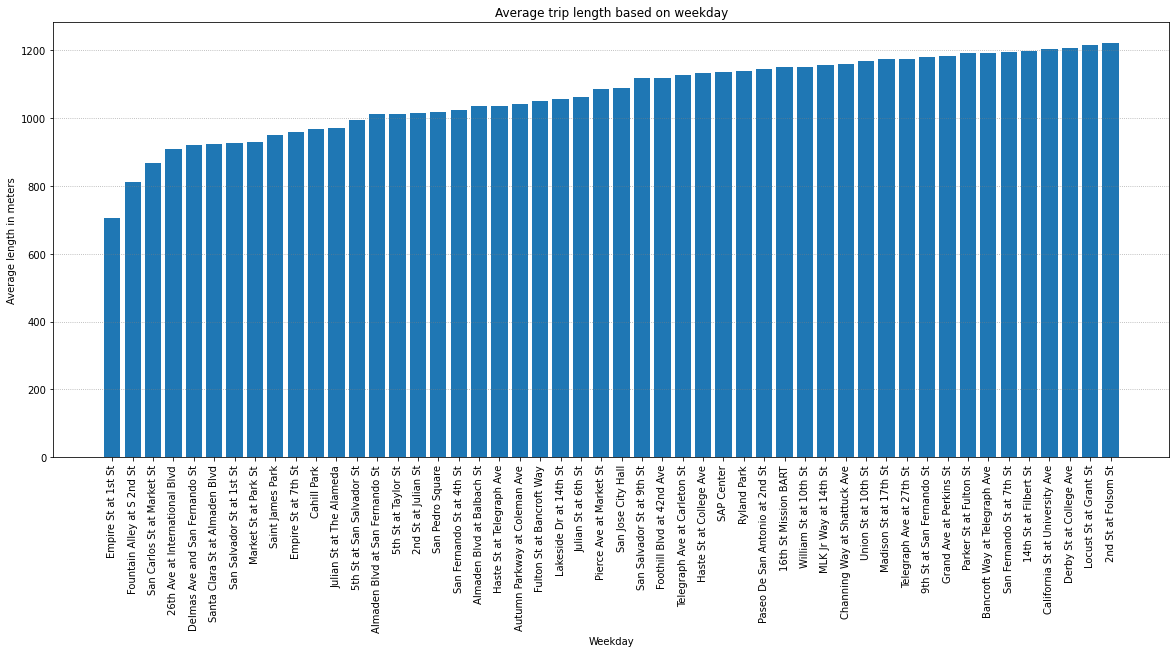

In [532]:
bar_chart(drop_location_high_dis['distance_start_end'].sort_values(ascending=True),color,
          'Average trip length based on weekday',
         'Weekday','Average length in meters',90,20,8)

Shortest trips are from Empire st. of just about 700m. Followed by Fountain Alley and San Carlos st.

#### Getting lowest 15% tips in terms of duration

In [533]:
drop_location_high = location[location.duration_min < location.duration_min.quantile(.15)]

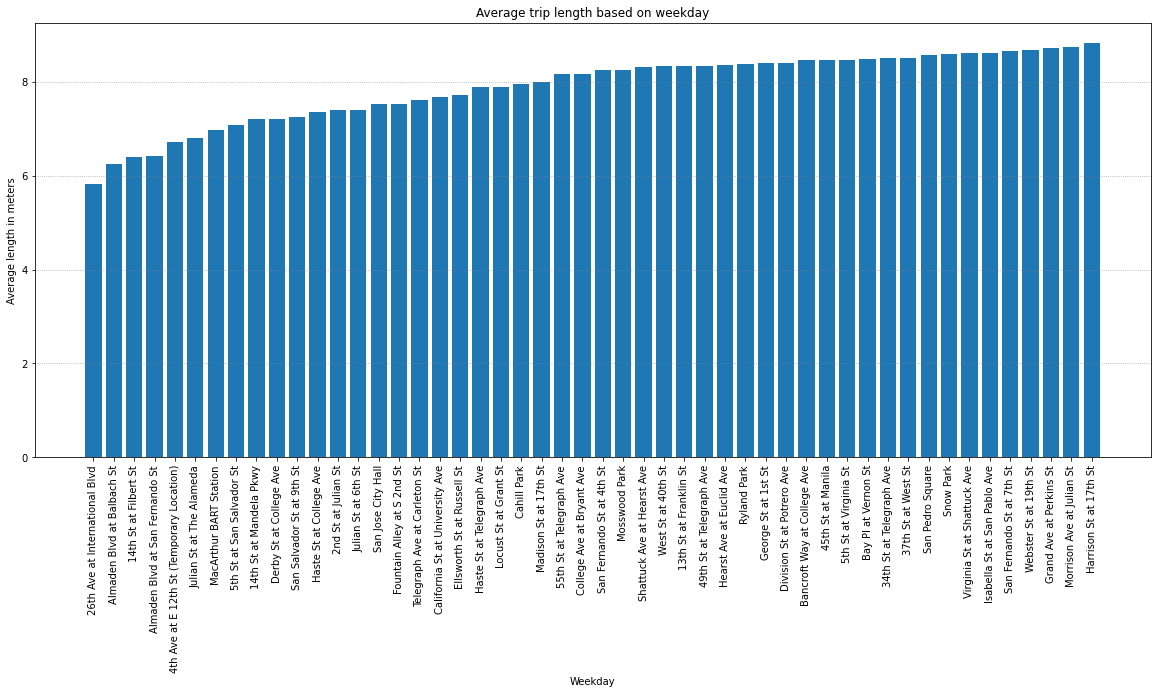

In [534]:
bar_chart(drop_location_high['duration_min'].sort_values(ascending=True),color,
          'Average trip length based on weekday',
         'Weekday','Average length in meters',90,20,8)

Shortest trips in terms of duration are from 26th Ave of lesst than 6min. Lowest 15% of trips don't reach 10min on average.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Analysing two variables at the time I found out that most cyclists are subscribers who cycle most on Thursdays and Tuesdays. Customers are 10 times less heavy users and cycle the most on Thursday and Friday. Moreover, seems like there is fairly weak relationship between duration of the trip and my calculated distances between start and end point. This could me that people tend to ride on different speeds and end station doesn't mean they directly cycle there. Also, I identified some outliers in age based in trip length in meters and duration. Many people included that are over 90 which looks very unreasonable. Also, identified stations where longest and shortest trips in both time and distances are. This is very useful information to understand which stations might need to have more bikes to facilitate demand. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Since this dataset is fairly small and take pretty much all information for my analysis.

## Multivariate Exploration

#### Using log scatterplot to plot duration over distance with age as color bar. 

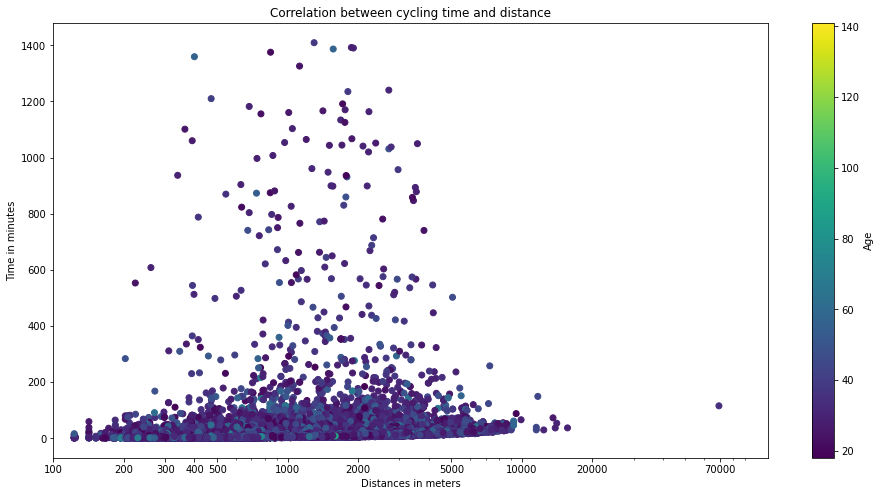

In [535]:
plt.figure(figsize=(16,8))

plt.xscale('log')
ticks = [100,200,300,400,500,1000,2000,5000,10000,20000,70000]
labels = ['{}'.format(x) for x in ticks]

plt.scatter(data=df, y = 'duration_min', x='distance_start_end', c= 'age')
bar = plt.colorbar()
bar.set_label('Age')

plt.xlabel('Distances in meters')
plt.ylabel('Time in minutes')
plt.title('Correlation between cycling time and distance')

plt.xticks(ticks,labels);

Overplotting is an issue here. When alpha is changed it becomes much harder to read colorbar and datapoints on scatterplot

#### Building same graph but taking only 1000 sample from dataset

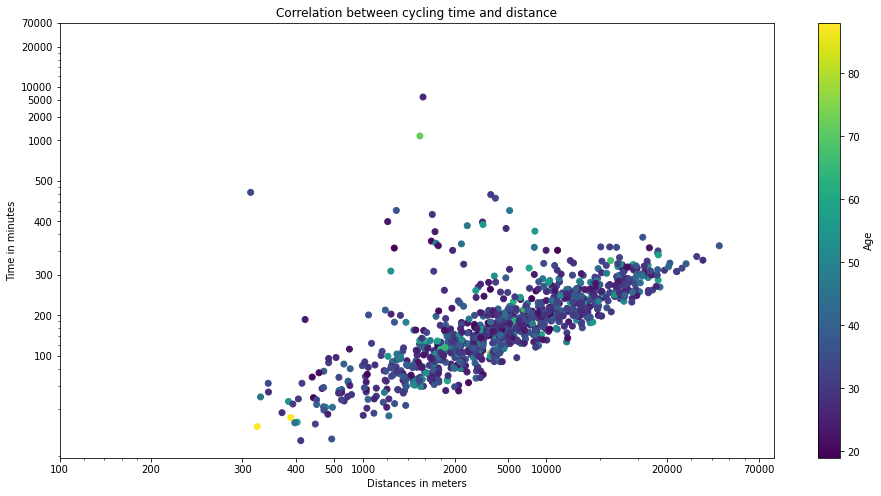

In [536]:
plt.figure(figsize=(16,8))

plt.xscale('log')
plt.yscale('log')

x_ticks = [50,100,200,300,400,500,1000,1500,2000,5000,10000]
x_labels = ['{}'.format(x) for x in ticks]

y_ticks = [5,10,20,50,100,200,300,400,500,1000,1500]
y_labels = ['{}'.format(x) for x in ticks]


plt.scatter(data=df.sample(1000), y = 'duration_min', x='distance_start_end', c= 'age')
bar = plt.colorbar()
bar.set_label('Age')

plt.xlabel('Distances in meters')
plt.ylabel('Time in minutes')
plt.title('Correlation between cycling time and distance')

plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels);

This looks much better.  We can see positive correlation between trip length and distance and most of longest trips are taken by those up to 60 years old.

In [537]:
#function for all heatmaps where mean is calculated
def heatmap_3(data,var1,var2,num_var3,fig_x,fig_y,bar_title,title):
    
    dis_means = df.groupby([var1, var2]).mean()[num_var3]
    dis_means = dis_means.reset_index(name = num_var3)
    dis_means = dis_means.pivot(index = var1, columns = var2,values = num_var3)
    fig, ax = plt.subplots(figsize=(fig_x,fig_y))
    sns.heatmap(dis_means, annot = True, fmt = '.0f',cmap='viridis',
               cbar_kws = {'label' : bar_title})
    plt.title(title);

#### Using heatmap to showcase cycling based on weekday and gender with colorbar being average distance

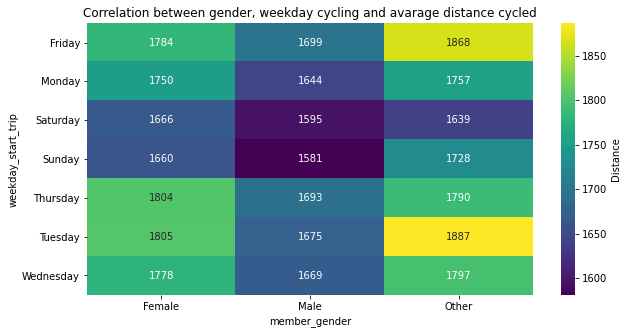

In [538]:
heatmap_3(df,'weekday_start_trip','member_gender','distance_start_end',10,5,
          'Distance','Correlation between gender, weekday cycling and avarage distance cycled')

It can be seen than male are taking shorter trips than female on everyday. Unidentified gender are taking in general longest trips which take place on Tuesday and Friday. 

#### Checking if there is any connection between average age, gender and user type

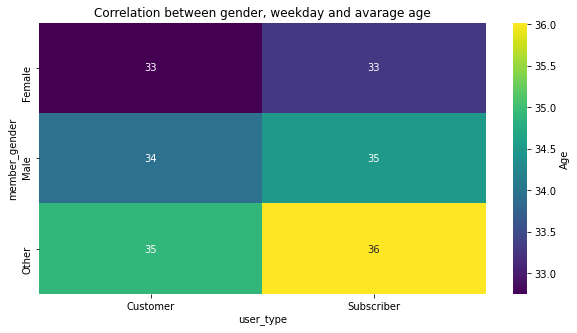

In [539]:
heatmap_3(df,'member_gender','user_type','age',10,5,
          'Age','Correlation between gender, weekday and avarage age')

It can be seen that on average females are youger than male cyclists regarless of user type. Where unidentified gender subscribers are on average oldest.

#### Checking if there is any connection between average distances, gender and user type

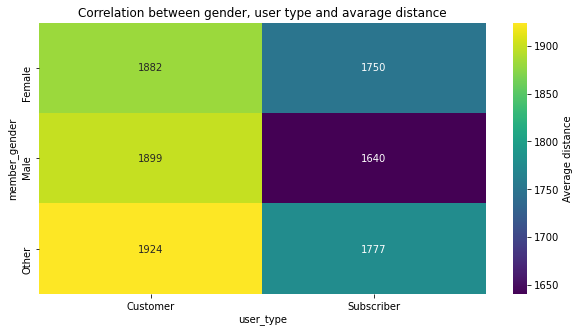

In [540]:
heatmap_3(df,'member_gender','user_type','distance_start_end',10,5,
          'Average distance','Correlation between gender, user type and avarage distance')

Other gender customers tend to cycle on average longest distance where male subscribers take shortest trips on average.

#### Checking if there is any connection between average distances, weekday and user type

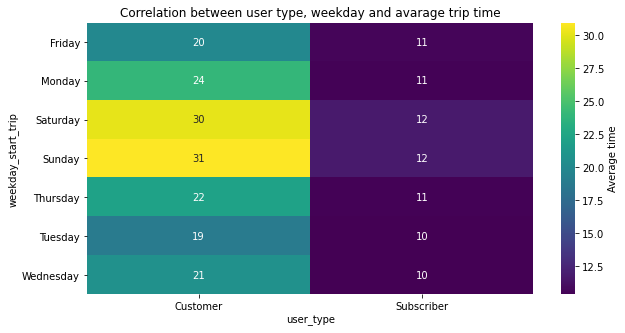

In [541]:
heatmap_3(df,'weekday_start_trip','user_type','duration_min',10,5,
          'Average time','Correlation between user type, weekday and avarage trip time')

It very clear that subscribers in general take more than twice shorter trips where those without subscription enjoy longer rides. Longest rides are for customers during the weekend.

#### Adding correlation matrixs to see how numerical variables are correlated

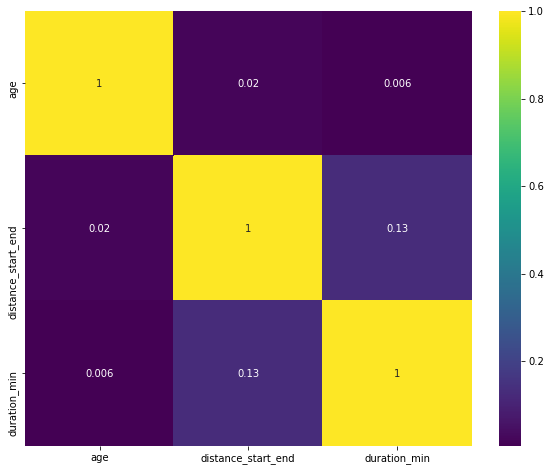

In [542]:
plt.figure(figsize=(10,8))
corrMatrix = df[['age','distance_start_end','duration_min']].corr()
sns.heatmap(corrMatrix, annot=True,cmap='viridis')
plt.show()

Strangely enough we don't see any strong correlation between variables. Strongest correlation is between distance and duration which is still weak. We probably could've expected negative correlation between age and other two variables but it stays at pretty much zero.

#### Using facet to plot correlation between weekday, user type, duration and distance

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


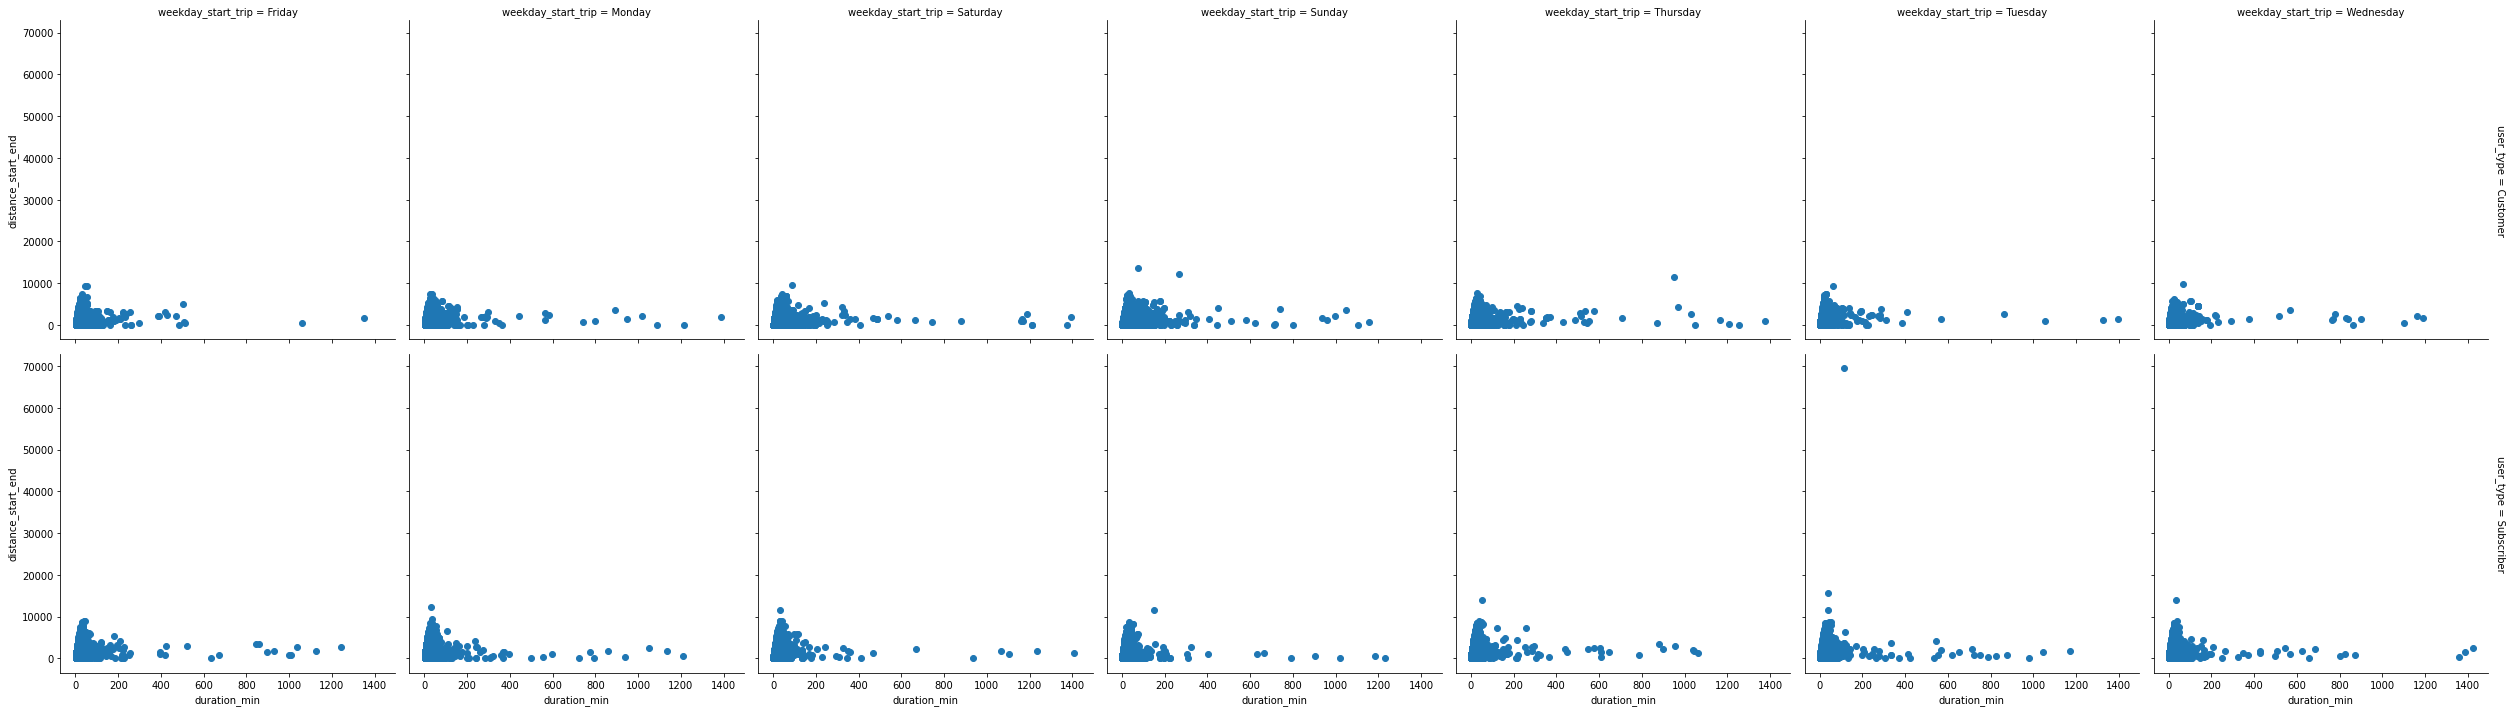

In [547]:
g = sns.FacetGrid(data = df, col = 'weekday_start_trip', row = 'user_type', size = 5,
                margin_titles = True)
g.map(plt.scatter,'duration_min', 'distance_start_end');

Facetgrid is not best option for this analysis. Due to scaling it gives little good information.

In [544]:
#function for all pointplots
def pointplot(cat_var1,cat_var2,num_var,size_x,size_y,title):
    plt.figure(figsize=(size_x,size_y))
    ax = sns.pointplot(data = df, x = cat_var1, y = num_var, 
                       hue = cat_var2,dodge = 0.1, linestyles = ":")
    plt.title(title)

#### Plotting customer type, weekday and distances cycled using pointplot

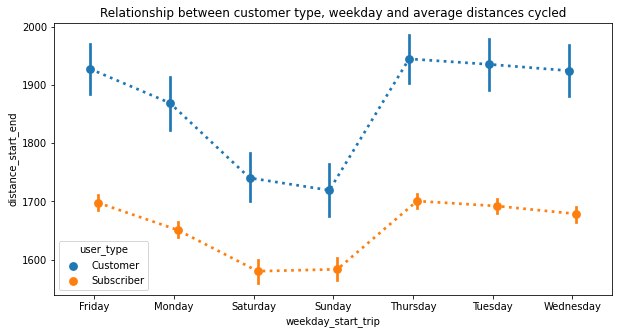

In [545]:
pointplot('weekday_start_trip','user_type','distance_start_end',10,5,
          'Relationship between customer type, weekday and average distances cycled')

Very informative plot showing cycling distance based on the weekday with some error margin. As proven before weekend trips tend to be shortest and Thursday longest for both customers and subscribers. 

#### Plotting customer type, weekday and duration cycled using pointplot

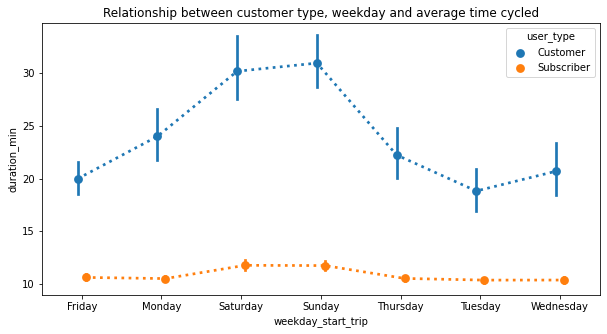

In [546]:
pointplot('weekday_start_trip','user_type','duration_min',10,5,
          'Relationship between customer type, weekday and average time cycled')

Here is opposite. Trips during weekend are longer than during business days. Also, Tuesday day that there are on average longest trips tend to be at same time shortest trips in time for both customers and subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part I focused on gender, customer type, age, distance, weekday and duration of the trip. I found out that even though male is main user of Ford GoBike but they actually cycle shorter distances than female throughout all days of the week. Also, that not many old people take long trips. As well, it seems like customers are taking longer trips throughout all days of the week than subscribers. This potentially indicates that people who subscribe used bikes as transportation where customers take bikes for fun ride. Finally, correlation matrix showed that numerical values show pretty much no correlation.

### Were there any interesting or surprising interactions between features?

> It was very surprising to see pretty much no correlation between distances and duration. Also, it was interesting to find out that women cycle further all days of the week.


#### Data sources used during this analysis: 
1. Udacity- templates
2. Stackoverflow for various analysis
3. Google maps to validate distances
4. Google to get earth radus
5. Pandas documentation and seaborn documentation